<a href="https://colab.research.google.com/github/bhattacharya5/BiologicalComputerVision/blob/main/Assignment3_M21AIE211_AmarnathBhattacharya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pomegranate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import required packages
import math
#pomegranate is used to calculate Bayesian probability
from pomegranate import *
#pygraphviz is used to draw the model diagram 
import pygraphviz as pgv

In [ ]:

# Probability fruits origincated from Tamilnadu and Kashmir 
place =DiscreteDistribution( { 'TN': 0.3, 'K': 0.7  } )
 
# Probability fruits produced during Spring / Autumn
season =DiscreteDistribution( { 'Au': 0.6, 'S': 0.4 } )
 
# Probablity distribution for Banana / Apple 
fruit =ConditionalProbabilityTable(
[[ 'TN', 'Au', 'B', 0.9 ],
[ 'TN', 'S', 'B', 0.7 ],
[ 'K', 'Au', 'B', 0.3 ],
[ 'K', 'S', 'B', 0.2 ],
[ 'TN', 'Au', 'A', 0.1 ],
[ 'TN', 'S', 'A', 0.3 ],
[ 'K', 'Au', 'A', 0.7 ],
[ 'K', 'S', 'A', 0.8 ]], [place , season] )

#Predicting probability of color for Banana / Apple
color =ConditionalProbabilityTable(
[[ 'B', 'R', 0.1 ],
[ 'A', 'R', 0.7 ],
[ 'B', 'G', 0.4 ],
[ 'A', 'G', 0.2 ],
[ 'B', 'Y', 0.5 ],
[ 'A', 'Y', 0.1 ]], [fruit] )

#Predicting probability of shape for Banana / Apple 
shape =ConditionalProbabilityTable(
[[ 'B', 'Ro', 0.1 ],
[ 'A', 'Ro', 0.8 ],
[ 'B', 'L', 0.9 ],
[ 'A', 'L', 0.2 ]], [fruit] )

 
d1 = State( place, name="place" )
d2 = State( season, name="season" )
d3 = State( fruit, name="furit" )
d4 = State( color, name="color" )
d5 = State( shape, name="shape" )
 
#Building the Bayesian Network
network = BayesianNetwork( "Solving the Monty Hall Problem With Bayesian Networks" )
network.add_states(d1, d2, d3,d4,d5)
network.add_edge(d1, d3)
network.add_edge(d2, d3)
network.add_edge(d3, d4)
network.add_edge(d3, d5)
network.bake()

In [ ]:
beliefs = network.predict_proba({ 'place' : 'TN' , 'season' : 'Au' , 'color' : 'R' , 'shape' : 'Ro' })
beliefs = map(str, beliefs)
print("n".join( "{}t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) ))

placetTNnseasontAunfuritt{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "B" : 0.1384615384615384,
            "A" : 0.8615384615384615
        }
    ],
    "frozen" : false
}ncolortRnshapetRo


In [ ]:
beliefs = network.predict_proba({ 'place' : 'K' , 'season' : 'S' , 'color' : 'G' , 'shape' : 'L' })
beliefs = map(str, beliefs)
print("n".join( "{}t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) ))

placetKnseasontSnfuritt{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "B" : 0.6923076923076925,
            "A" : 0.30769230769230754
        }
    ],
    "frozen" : false
}ncolortGnshapetL


In [ ]:
beliefs = network.predict_proba({ 'place' : 'K' , 'season' : 'S' , 'color' : 'G' , 'shape' : 'Ro' })
beliefs = map(str, beliefs)
print("n".join( "{}t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) ))

placetKnseasontSnfuritt{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "B" : 0.05882352941176488,
            "A" : 0.9411764705882351
        }
    ],
    "frozen" : false
}ncolortGnshapetRo


In [ ]:
beliefs = network.predict_proba({  'season' : 'S' , 'color' : 'G' , 'shape' : 'Ro' })
beliefs = map(str, beliefs)
print("n".join( "{}t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) ))

placet{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "TN" : 0.193220338983051,
            "K" : 0.806779661016949
        }
    ],
    "frozen" : false
}nseasontSnfuritt{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "B" : 0.11864406779661035,
            "A" : 0.8813559322033897
        }
    ],
    "frozen" : false
}ncolortGnshapetRo


In [ ]:
print(network)


Solving the Monty Hall Problem With Bayesian Networks:{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "TN" : 0.3,
                "K" : 0.7
            }
        ],
        "frozen" : false
    },
    "name" : "place",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "Au" : 0.6,
                "S" : 0.4
            }
        ],
        "frozen" : false
    },
    "name" : "season",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "ConditionalProbabilityTable",
        "table" : [
            [
                "TN",
                "Au",
                "B",
                "0.9"
            ],

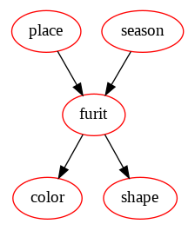

In [ ]:
network.plot()